In [92]:
los_dirs = ['x', 'y', 'z']

a = dict.fromkeys(los_dirs, {})
a['x']['a'] = 1
a['x']['b'] = 1
a['y']['a'] = 2
a
# a['y'] = 
# a
# a
# b = {'x': {}, 'y': {}, 'z': {}}
# b['x']['qq'] = 1
# b

{'x': {'a': 2, 'b': 1}, 'y': {'a': 2, 'b': 1}, 'z': {'a': 2, 'b': 1}}

In [189]:
import numpy as np
import pandas as pd
from pathlib import Path
from sunbird.emulators import SunbirdTrainer


data_dir = Path('/pscratch/sd/e/epaillas/emc')

lhc_y = np.load(data_dir / 'training_sets/tpcf/z0.5/yuan23_prior/cosmopower/tpcf.npy', allow_pickle=True,).item()
s = lhc_y['s']
lhc_y = lhc_y['multipoles']
lhc_x = pd.read_csv(data_dir / 'hod_params/yuan23/hod_params_yuan23_c000.csv')
lhc_x_names = list(lhc_x.columns)
lhc_x_names = [name.replace(' ', '').replace('#', '') for name in lhc_x_names]
lhc_x = lhc_x.values[:len(lhc_y),:]

# let's keep a few points for testing the model
lhc_train_y = lhc_y[:-100]
lhc_train_x = lhc_x[:-100]

lhc_test_y = lhc_y[-100:]
lhc_test_x = lhc_x[-100:]

batch_size = 256
num_workers = 4
train_mean = np.mean(lhc_y, axis=0)
train_std = np.std(lhc_y, axis=0)

train_mean_x = np.mean(lhc_x, axis=0)
train_std_x = np.std(lhc_x, axis=0)


lhc_x_standarized = (lhc_x - train_mean_x) / train_std_x
lhc_y_standarized = (lhc_y - train_mean) / train_std


trainer = SunbirdTrainer(x=lhc_x_standarized, y=lhc_y_standarized, 
                         val_fraction=0.1, batch_size=batch_size,
                         num_workers=num_workers)

val_loss, model, early_stop_callback = trainer.fit(
    n_hidden=[512, 512, 512, 512,], 
    dropout_rate=0., 
    learning_rate=1.e-3,
    scheduler_patience=30,
    scheduler_factor=0.5,
    scheduler_threshold=1.e-6,
    weight_decay=0.,
    early_stop_patience=30,
    early_stop_threshold=1.e-7,
    train_mean=train_mean,
    train_std=train_std,
    model_dir='test_batch1000/'
    #val_check_interval=1,
)

Seed set to 42
/global/homes/e/epaillas/.local/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /global/common/software/desi/users/adematti/perlmutt ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/global/homes/e/epaillas/.local/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
/global/homes/e/epaillas/.local/lib/python3.10/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:653: Checkpoint directory /global/cfs/cdirs/desicollab/users/epaillas/code/sunbird/nb/my_m

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 0.501


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.053 >= min_delta = 1e-07. New best score: 0.448


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.054 >= min_delta = 1e-07. New best score: 0.394


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 1e-07. New best score: 0.393


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.100 >= min_delta = 1e-07. New best score: 0.293


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.046 >= min_delta = 1e-07. New best score: 0.246


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.004 >= min_delta = 1e-07. New best score: 0.243


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.015 >= min_delta = 1e-07. New best score: 0.227


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.032 >= min_delta = 1e-07. New best score: 0.195


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.004 >= min_delta = 1e-07. New best score: 0.191


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.005 >= min_delta = 1e-07. New best score: 0.186


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.025 >= min_delta = 1e-07. New best score: 0.161


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.005 >= min_delta = 1e-07. New best score: 0.156


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.013 >= min_delta = 1e-07. New best score: 0.143


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 1e-07. New best score: 0.133


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/global/homes/e/epaillas/.local/lib/python3.10/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


100

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
from pycorr import TwoPointCorrelationFunction
from sunbird.emulators import FCN
import torch

def read_lhc(return_sep=False):
    data_dir = Path('/pscratch/sd/e/epaillas/emc')
    data_fn = Path(data_dir) / 'training_sets/tpcf/z0.5/yuan23_prior/cosmopower/tpcf.npy'
    lhc_y = np.load(data_fn, allow_pickle=True,).item()
    s = lhc_y['s']
    lhc_y = lhc_y['multipoles']
    lhc_x = pd.read_csv(data_dir / 'hod_params/yuan23/hod_params_yuan23_c000.csv')
    lhc_x_names = list(lhc_x.columns)
    lhc_x_names = [name.replace(' ', '').replace('#', '') for name in lhc_x_names]
    lhc_x = lhc_x.values[:len(lhc_y),:]
    if return_sep:
        return s, lhc_x, lhc_y
    return lhc_x, lhc_y

def read_covariance():
    data_dir = Path('/pscratch/sd/e/epaillas/emc')
    covariance_path = data_dir / 'covariance/tpcf/z0.5/yuan23_prior/'
    n_for_covariance = 1_000
    covariance_files = list(covariance_path.glob('tpcf_ph*.npy'))[:n_for_covariance]
    covariance_y = [
        TwoPointCorrelationFunction.load(file)[::4](ells=(0,2),).reshape(-1) for file in covariance_files
    ]
    prefactor = 1./8.
    return prefactor * np.cov(np.array(covariance_y).T)

covariance_matrix = read_covariance()

Seed set to 42


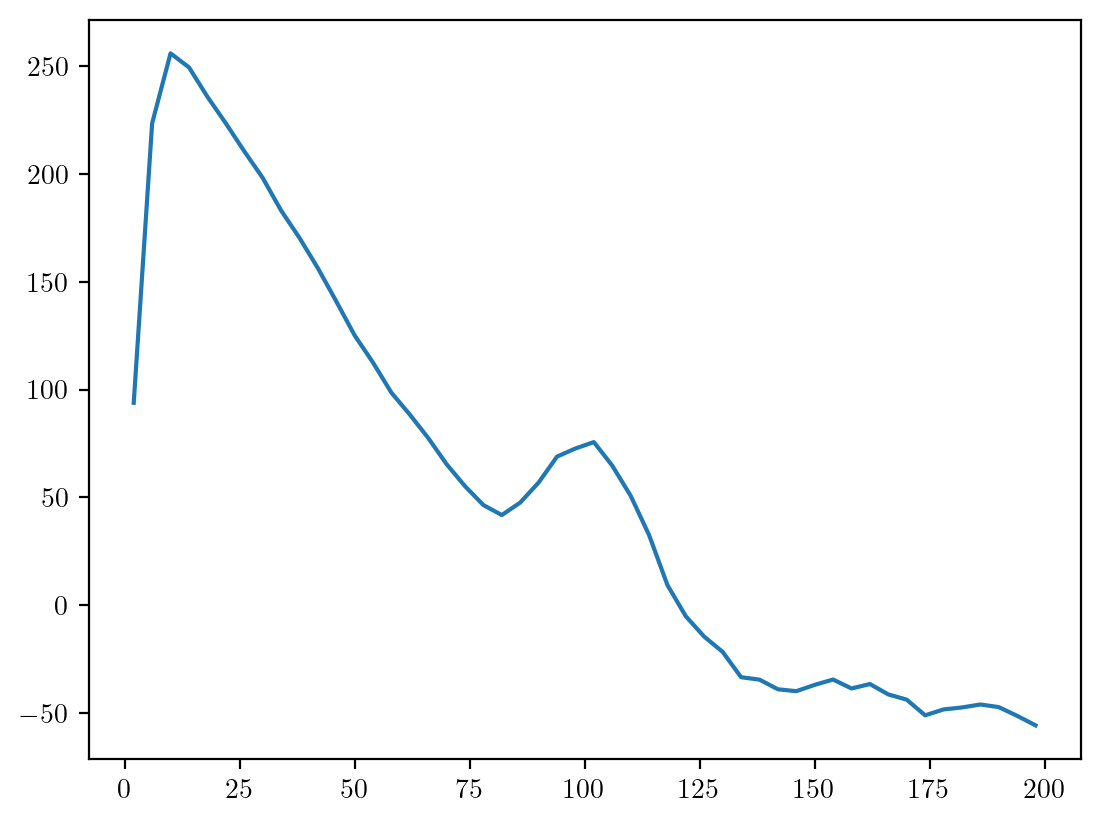

In [15]:
from sunbird.emulators.models import FCN
import torch
from lightning import seed_everything

seed_everything(42)

checkpoint_fn = "/pscratch/sd/e/epaillas/emc/trained_models/tpcf/may9_leaveout_0/best-model-epoch=296-val_loss=0.07.ckpt"
model = FCN.load_from_checkpoint(checkpoint_fn, strict=True)
model.eval()

fig, ax = plt.subplots()

with torch.no_grad():
    pred_test_y = model.get_prediction(torch.Tensor(lhc_test_x))
    pred_test_y = pred_test_y.numpy()

ax.plot(s, s**2*pred_test_y[0, :len(s)])
    
plt.show()

Loaded LHC with shape: (30000, 12), (30000, 100)
After sigma clipping: (29226, 12), (29226, 100)


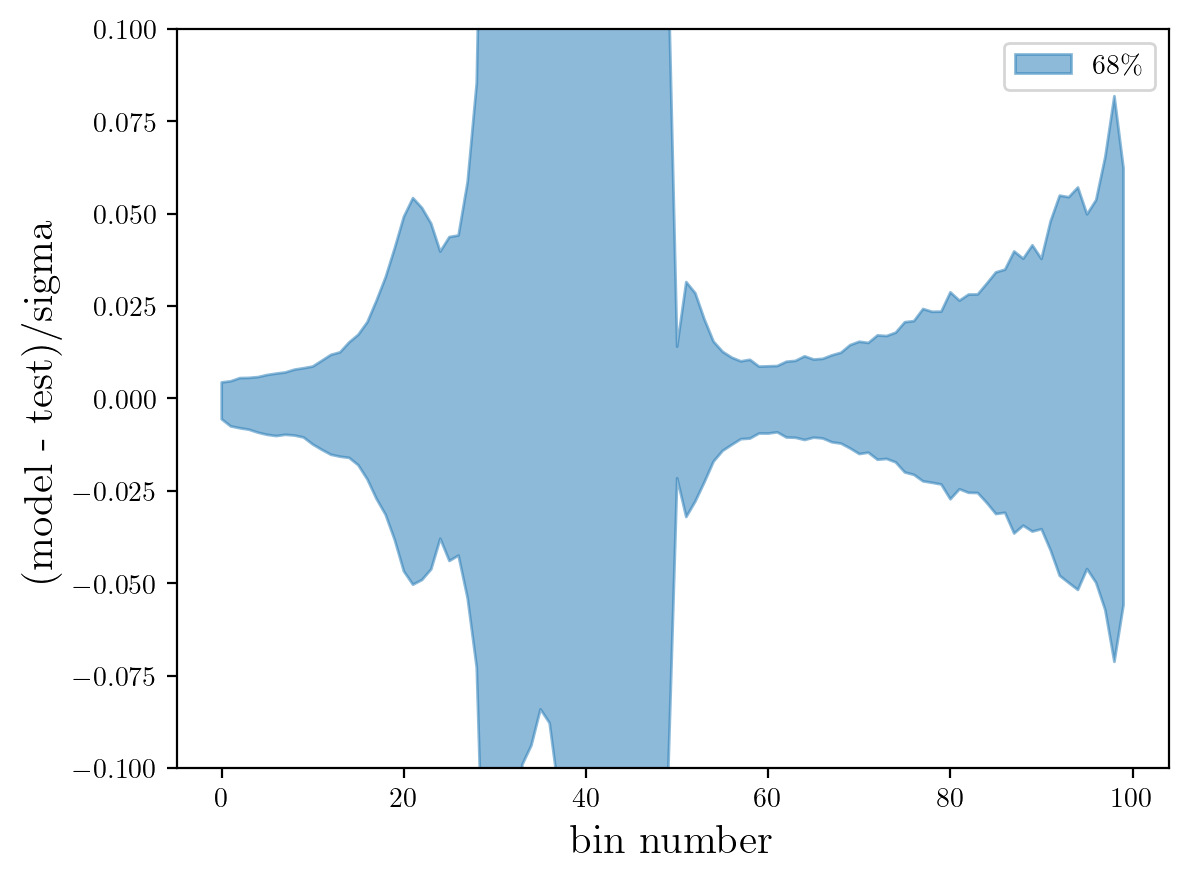

Text(0, 0.5, '(model - test)/sigma')

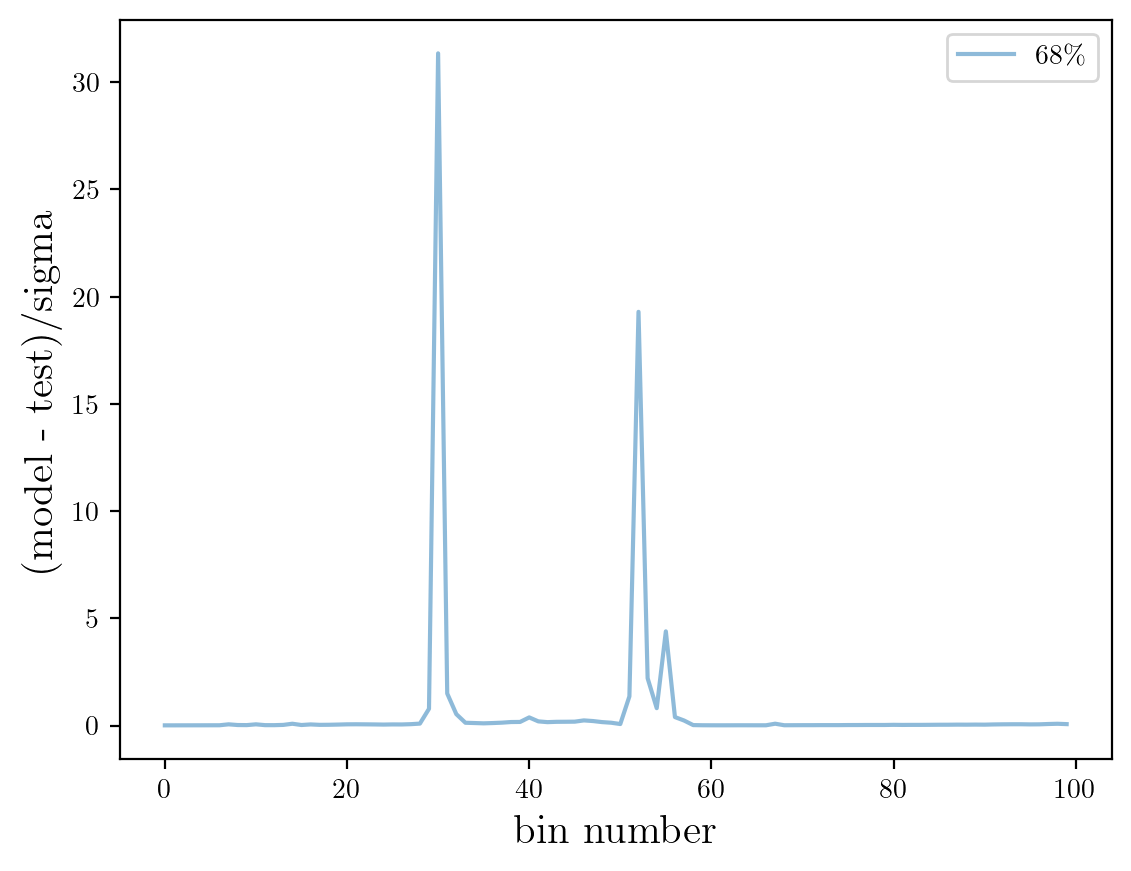

In [13]:
from pathlib import Path
import numpy as np
import pandas as pd
from astropy.stats import sigma_clip
from pycorr import TwoPointCorrelationFunction
from sunbird.emulators import FCN
import torch
import matplotlib.pyplot as plt
import glob
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def read_lhc(return_sep=False):
    data_dir = Path('/pscratch/sd/e/epaillas/emc')
    data_fn = Path(data_dir) / 'training_sets/tpcf/z0.5/yuan23_prior/cosmopower/tpcf.npy'
    lhc_y = np.load(data_fn, allow_pickle=True,).item()
    s = lhc_y['s']
    lhc_y = lhc_y['multipoles']
    lhc_x = pd.read_csv(data_dir / 'hod_params/yuan23/hod_params_yuan23_c000.csv')
    lhc_x_names = list(lhc_x.columns)
    lhc_x_names = [name.replace(' ', '').replace('#', '') for name in lhc_x_names]
    lhc_x = lhc_x.values[:len(lhc_y),:]
    if return_sep:
        return s, lhc_x, lhc_y
    return lhc_x, lhc_y

def read_covariance():
    data_dir = Path('/pscratch/sd/e/epaillas/emc')
    covariance_path = data_dir / 'covariance/tpcf/z0.5/yuan23_prior/'
    n_for_covariance = 1_000
    covariance_files = list(covariance_path.glob('tpcf_ph*.npy'))[:n_for_covariance]
    covariance_y = [
        TwoPointCorrelationFunction.load(file)[::4](ells=(0,2),).reshape(-1) for file in covariance_files
    ]
    prefactor = 1./8.
    return prefactor * np.cov(np.array(covariance_y).T)

covariance_matrix = read_covariance()
s, lhc_x, lhc_y = read_lhc(return_sep=True)
print(f'Loaded LHC with shape: {lhc_x.shape}, {lhc_y.shape}')

# mask outliers
mask = sigma_clip(lhc_y, sigma=6, axis=0, masked=True).mask
mask = np.all(~mask, axis=1)
lhc_x = lhc_x[mask]
lhc_y = lhc_y[mask]
print(f'After sigma clipping: {lhc_x.shape}, {lhc_y.shape}')


ntot = len(lhc_y)
nstep = int(ntot / 5)
q68_all = []
q95_all = []
emuerr_all = []
emulator_error_all = []
for i in range(0, 5):
    start_idx = i * nstep
    end_idx = (i + 1) * nstep
    idx_train = list(range(0, start_idx)) + list(range(end_idx, ntot))
    idx_test = list(range(start_idx, end_idx))

    lhc_train_x = lhc_x[idx_train]
    lhc_train_y = lhc_y[idx_train]
    lhc_test_x = lhc_x[idx_test]
    lhc_test_y = lhc_y[idx_test]
    
    checkpoint_fn = glob.glob(f'/pscratch/sd/e/epaillas/emc/trained_models/tpcf/may20b_leaveout_{i}/*.ckpt')[0]
    # checkpoint_fn = glob.glob(f'/pscratch/sd/e/epaillas/emc/trained_models/tpcf/silu_leaveout_{i}/*.ckpt')[0]
    model = FCN.load_from_checkpoint(checkpoint_fn, strict=True)
    model.eval()
    
    with torch.no_grad():
        pred_test_y = model.get_prediction(torch.Tensor(lhc_test_x))
        pred_test_y = pred_test_y.numpy()
        
    emulator_error = (pred_test_y - lhc_test_y)/np.sqrt(np.diag(covariance_matrix))
    q68 = np.quantile(emulator_error, [0.16, 0.84], axis=0)
    q95 = np.quantile(emulator_error, [0.025, 0.975], axis=0)
    q99 = np.quantile(emulator_error, [0.005, 0.995], axis=0)
    
    q68_all.append(q68)
    q95_all.append(q95)
    # emulator_error_all.append((pred_test_y - lhc_test_y)/np.sqrt(np.diag(covariance_matrix)))
    emulator_error_all.append((pred_test_y - lhc_test_y)/lhc_test_y)
    emuerr_all.append(pred_test_y - lhc_test_y)
    
# q68_all = np.array(q68_all).mean(axis=0)
# q95_all = np.array(q95_all).mean(axis=0)
emulator_error_all = np.concatenate(emulator_error_all)
q68_all = np.quantile(emulator_error_all, [0.16, 0.84], axis=0)
emu_cov = np.cov(emulator_error_all, rowvar=False)
                      
fig, ax = plt.subplots()

# for i in range(len(emulator_error_all)):
#     ax.plot(list(range(emulator_error.shape[1])), emulator_error_all[i], color='grey', lw=0.2)
# ax.fill_between(list(range(emulator_error.shape[1])), q95_all[0], q95_all[1], alpha=0.5, label='95\%', color='C1')
ax.fill_between(list(range(emulator_error.shape[1])), q68_all[0], q68_all[1], alpha=0.5, label='68\%', color='C0')
ax.legend()
ax.set_xlabel('bin number', fontsize=15)
ax.set_ylabel('(model - test)/sigma', fontsize=15)
plt.ylim(-0.1,0.1)

plt.show()

fig, ax = plt.subplots()
# ax.fill_between(list(range(emulator_error.shape[1])), q95_all[0], q95_all[1], alpha=0.5, label='95\%', color='C1')
ax.plot(list(range(emulator_error.shape[1])), np.sqrt(np.diag(emu_cov)), alpha=0.5, label='68\%', color='C0')
ax.legend()
ax.set_xlabel('bin number', fontsize=15)
# ax.set_ylabel('(model - test)/sigma', fontsize=15)
ax.set_ylabel('(model - test)/sigma', fontsize=15)
# plt.ylim(-3,3)

# plt.show()

    
    # fig, ax = plt.subplots()
    # for j in range(len(lhc_test_y)):
    
        # ax.plot(s, s**2*lhc_train_y[j, :len(s)], ls='-')
        # ax.plot(s, s**2*pred_test_y[j, :len(s)], ls='-')
        
    # plt.show()
#     # ax.plot(s, s**2*pred_test_y[idx, :len(s)])
    
    

# # model.eval()
# # model = model.cpu()
# with torch.no_grad():
#     pred_test_y, _ = model(torch.Tensor(lhc_x_test_standarized))
# pred_test_y = pred_test_y.numpy()
# pred_test_y = pred_test_y * train_std + train_mean

# # pred_test_y.shape
# fig, ax = plt.subplots()
# ax.plot(s, s**2*lhc_test_y[idx, :len(s)], marker='o', ls='')
# ax.plot(s, s**2*pred_test_y[idx, :len(s)])

(3000, 100)


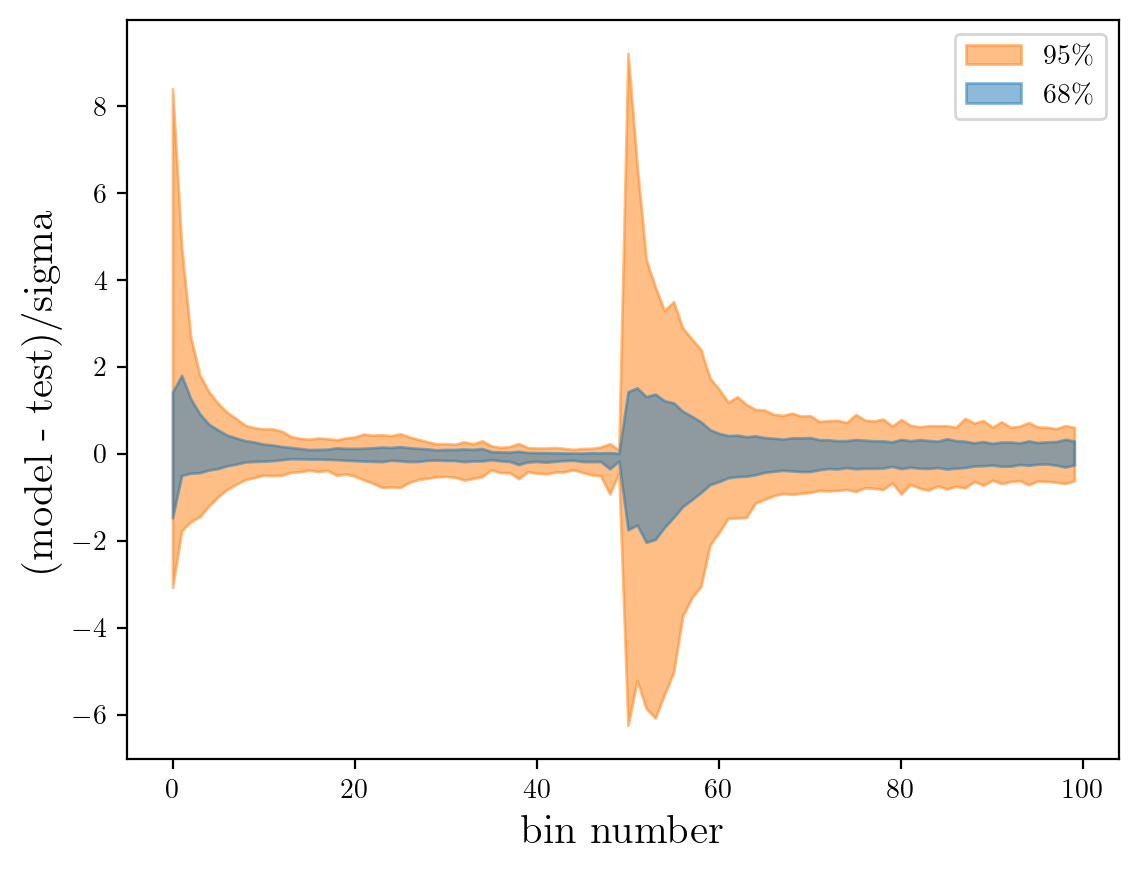

In [10]:
emulator_error = (pred_test_y - lhc_test_y)/np.sqrt(np.diag(covariance_matrix))
print(emulator_error.shape)
q68 = np.quantile(emulator_error, [0.16, 0.84], axis=0)
q95 = np.quantile(emulator_error, [0.025, 0.975], axis=0)
q99 = np.quantile(emulator_error, [0.005, 0.995], axis=0)

plt.fill_between(list(range(emulator_error.shape[1])), q95[0], q95[1], alpha=0.5, label='95\%', color='C1')
plt.fill_between(list(range(emulator_error.shape[1])), q68[0], q68[1], alpha=0.5, label='68\%', color='C0')
plt.legend()
plt.xlabel('bin number', fontsize=15)
plt.ylabel('(model - test)/sigma', fontsize=15)
# plt.ylim(-3,3)

plt.show()

In [3]:
# import jax, jaxlib
# jax.config.update('jax_enable_x64', True)
# jax.config.update('jax_platform_name', 'cpu')

from desilike.likelihoods import ObservablesGaussianLikelihood 
from lightning.pytorch.loggers import WandbLogger 

import numpy as np
import pandas as pd
import torch
from pathlib import Path

from lightning.pytorch.callbacks import ModelCheckpoint, EarlyStopping, LearningRateMonitor
from sunbird.emulators import FCN
from lightning import Trainer, seed_everything

from pycorr import TwoPointCorrelationFunction
import matplotlib.pyplot as plt

from sunbird.data import ArrayDataModule

data_dir = Path('/pscratch/sd/e/epaillas/emc')

lhc_y = np.load(data_dir / 'training_sets/tpcf/z0.5/yuan23_prior/cosmopower/tpcf.npy', allow_pickle=True,).item()
s = lhc_y['s']
lhc_y = lhc_y['multipoles']
lhc_x = pd.read_csv(data_dir / 'hod_params/yuan23/hod_params_yuan23_c000.csv')
lhc_x_names = list(lhc_x.columns)
lhc_x_names = [name.replace(' ', '').replace('#', '') for name in lhc_x_names]
lhc_x = lhc_x.values[:len(lhc_y),:]

# let's keep a few points for testing the model
lhc_train_y = lhc_y[:-100]
lhc_train_x = lhc_x[:-100]

lhc_test_y = lhc_y[-100:]
lhc_test_x = lhc_x[-100:]

batch_size = 256
num_workers = 4
train_mean = np.mean(lhc_y, axis=0)
train_std = np.std(lhc_y, axis=0)

train_mean_x = np.mean(lhc_x, axis=0)
train_std_x = np.std(lhc_x, axis=0)


lhc_x_standarized = (lhc_x - train_mean_x) / train_std_x
lhc_y_standarized = (lhc_y - train_mean) / train_std
dm = ArrayDataModule(
    torch.Tensor(lhc_x_standarized), 
    torch.Tensor(lhc_y_standarized), 
    val_fraction=0.1, 
    batch_size=batch_size,
    num_workers=num_workers,
)
dm.setup()

def fit(**kwargs):
    early_stop_callback = EarlyStopping(
        monitor="val_loss", 
        patience=kwargs['early_stop_patience'], 
        min_delta=kwargs['early_stop_threshold'],
        mode="min", 
        verbose=True, 
        check_on_train_epoch_end=True,
    )
    checkpoint_callback = ModelCheckpoint(
        monitor='val_loss',
        dirpath='my_model_checkpoints',
        filename='best-model-{epoch:02d}-{val_loss:.2f}',
        save_top_k=1,
        mode='min',
    )
    lr_monitor = LearningRateMonitor(logging_interval='step')

    model = FCN(
        n_input=dm.n_input,
        n_output=dm.n_output,
        n_hidden=kwargs['n_hidden'],
        dropout_rate=kwargs['dropout_rate'],
        learning_rate=kwargs['learning_rate'],
        scheduler_patience=kwargs['scheduler_patience'],
        scheduler_factor=kwargs['scheduler_factor'],
        scheduler_threshold=kwargs['scheduler_threshold'],
        weight_decay=kwargs['weight_decay'],
        act_fn='learned_sigmoid', #'SiLU',
        loss='rmse',
        load_loss=True,
        output_transforms=None,
        log=True,
        mean_output = train_mean,
        std_output = train_std,
    )

    seed_everything(42, workers=True)

    logger = WandbLogger(log_model="all", project="sunbird")

    trainer = Trainer(
        accelerator="auto",
        callbacks=[early_stop_callback, checkpoint_callback, lr_monitor],
        gradient_clip_val=0.5,
        deterministic=True,
        max_epochs=1_000,
        logger=logger,
        check_val_every_n_epoch=1,
    )
    trainer.fit(
        model=model,
        #datamodule=dm,
        train_dataloaders=dm.train_dataloader(),
        val_dataloaders=dm.val_dataloader(),
    )
    best_val_epoch = early_stop_callback.best_score.item()
    weights_dict = torch.load(
        checkpoint_callback.best_model_path,
        map_location=torch.device("cuda"),
    )
    state_dict = weights_dict["state_dict"]
    model.load_state_dict(state_dict, strict=True)
    return best_val_epoch, model, early_stop_callback


val_loss, model, early_stop_callback = fit(
    n_hidden=[512, 512, 512, 512,], 
    dropout_rate=0., 
    learning_rate=1.e-3,
    scheduler_patience=30,
    scheduler_factor=0.5,
    scheduler_threshold=1.e-6,
    weight_decay=0.,
    early_stop_patience=50,
    early_stop_threshold=1.e-7,
    #val_check_interval=1,
)

[rank: 0] Seed set to 42
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /global/homes/e/epaillas/.netrc



  | Name | Type       | Params
------------------------------------
0 | mlp  | Sequential | 845 K 
------------------------------------
845 K     Trainable params
0         Non-trainable params
845 K     Total params
3.384     Total estimated model params size (MB)
SLURM auto-requeueing enabled. Setting signal handlers.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 0.568


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.126 >= min_delta = 1e-07. New best score: 0.442


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.017 >= min_delta = 1e-07. New best score: 0.424


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.124 >= min_delta = 1e-07. New best score: 0.300


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 1e-07. New best score: 0.290


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.017 >= min_delta = 1e-07. New best score: 0.273


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.027 >= min_delta = 1e-07. New best score: 0.246


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.059 >= min_delta = 1e-07. New best score: 0.187


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.023 >= min_delta = 1e-07. New best score: 0.164


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 1e-07. New best score: 0.152


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 1e-07. New best score: 0.150


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.017 >= min_delta = 1e-07. New best score: 0.134


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 1e-07. New best score: 0.131


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 1e-07. New best score: 0.120


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 1e-07. New best score: 0.119


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.004 >= min_delta = 1e-07. New best score: 0.115


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 1e-07. New best score: 0.112


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.013 >= min_delta = 1e-07. New best score: 0.099


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 1e-07. New best score: 0.096


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.009 >= min_delta = 1e-07. New best score: 0.088


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 1e-07. New best score: 0.086


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 1e-07. New best score: 0.085


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 00167: reducing learning rate of group 0 to 5.0000e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 1e-07. New best score: 0.073


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 1e-07. New best score: 0.071


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.013 >= min_delta = 1e-07. New best score: 0.058


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 1e-07. New best score: 0.056


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 00214: reducing learning rate of group 0 to 2.5000e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 1e-07. New best score: 0.054


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.006 >= min_delta = 1e-07. New best score: 0.049


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 1e-07. New best score: 0.047


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 00258: reducing learning rate of group 0 to 1.2500e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 1e-07. New best score: 0.047


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 1e-07. New best score: 0.046


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 1e-07. New best score: 0.045


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 1e-07. New best score: 0.045


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/global/homes/e/epaillas/.local/lib/python3.10/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

NameError: name 'val_loss' is not defined